In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dython.nominal import associations

# Read file dataset from CSV
data = pd.read_csv("Response Form.csv")

# Data detail
print(data.info())
print(data.describe(include='all'))
print(data.shape)


Matplotlib is building the font cache; this may take a moment.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Timestamp                             445 non-null    object 
 1   Permission                            445 non-null    object 
 2   PSI                                   443 non-null    object 
 3   Nama                                  364 non-null    object 
 4   Nomor Telepon                         354 non-null    object 
 5   Umur                                  443 non-null    object 
 6   Domisili                              443 non-null    object 
 7   Gender                                443 non-null    object 
 8   Status Perkawinan                     443 non-null    object 
 9   Jumlah Tanggungan                     443 non-null    object 
 10  Profesi                               443 non-null    object 
 11  Tujuan             

Handle missing value

Timestamp                                 0
Permission                                0
PSI                                       2
Nama                                     81
Nomor Telepon                            91
Umur                                      2
Domisili                                  2
Gender                                    2
Status Perkawinan                         2
Jumlah Tanggungan                         2
Profesi                                   2
Tujuan                                    2
Penghasilan                               2
Persentasi Tabungan dari Penghasilan      2
Rate Fungsionalitas                       2
Rate admin                                2
Rate limit                                2
Rate bunga                                2
Rate setoran awal                         2
Rate needs                                2
Other reason                            195
dtype: int64

 ---Visualization---


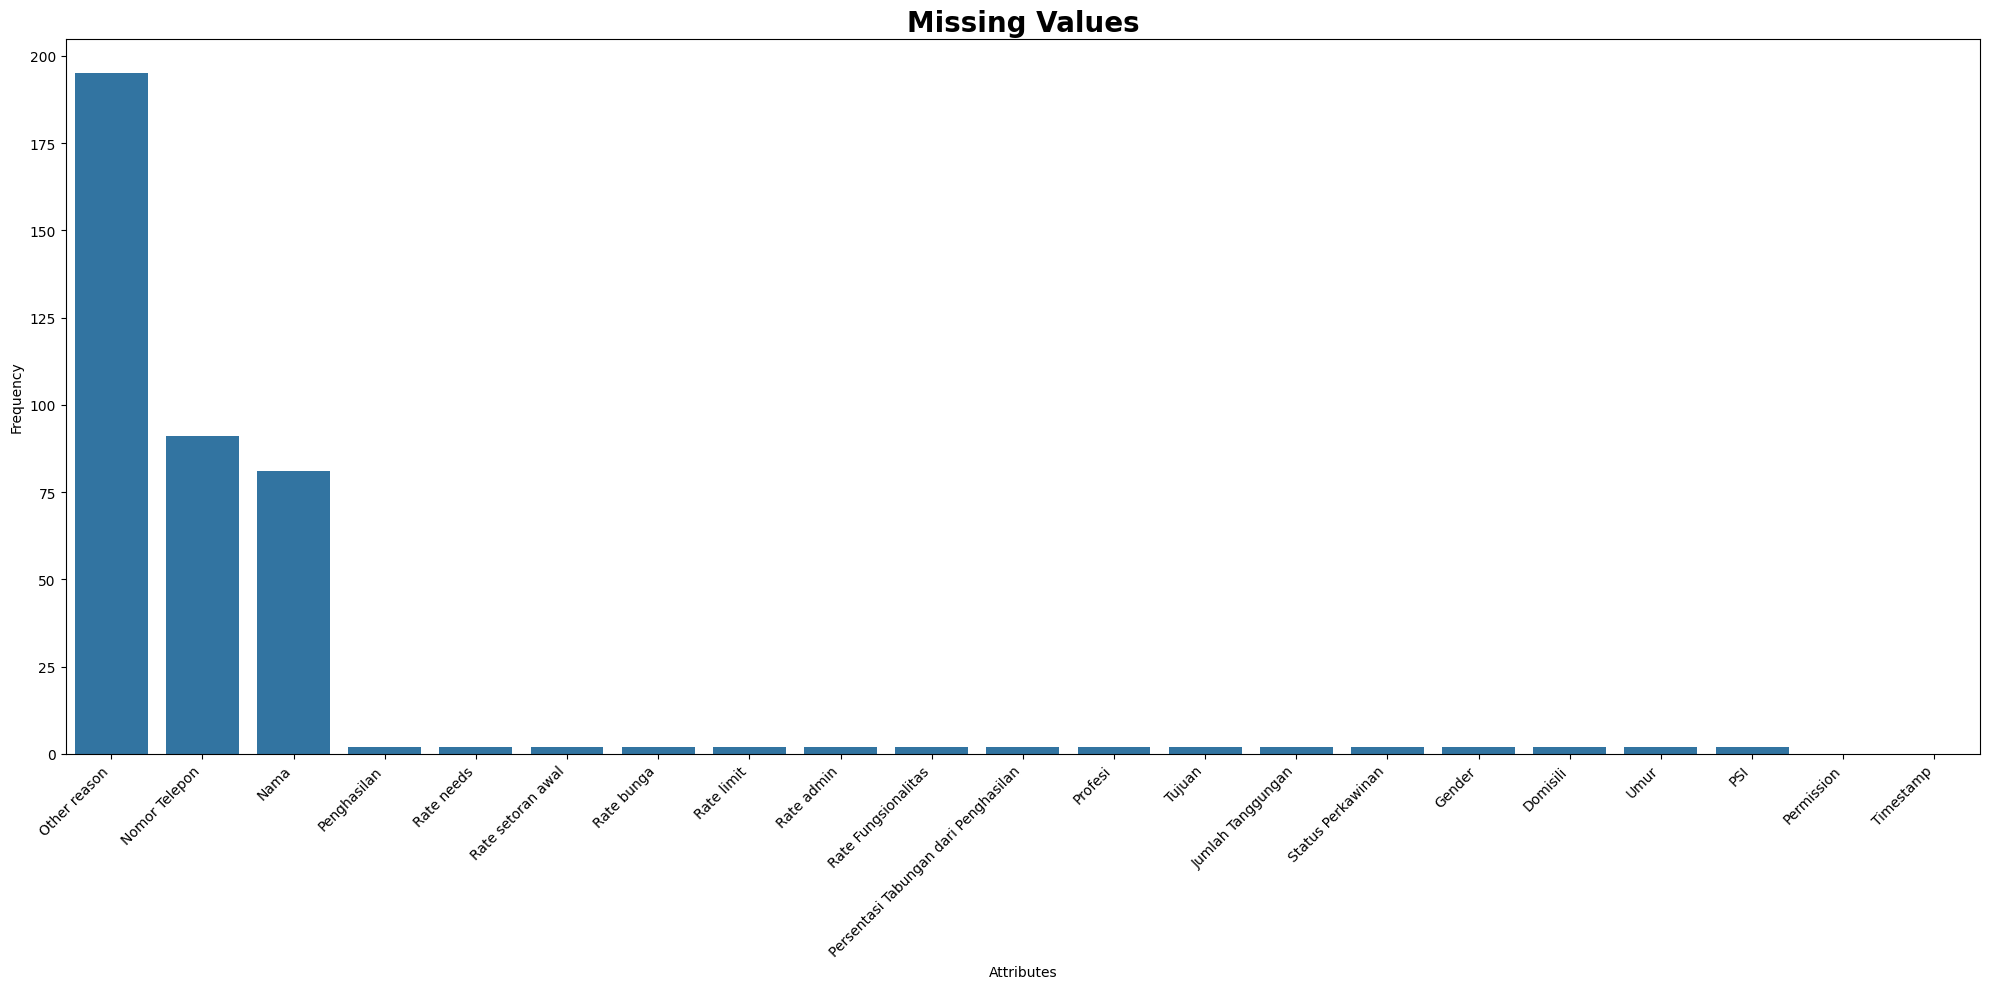

In [2]:
# Cek missing value kolom
print(data.isnull().sum())

print("\n ---Visualization---")

# DataFrame untuk menghitung missing values
missing_values = pd.DataFrame({
    'Attributes': data.columns,  # Nama kolom
    'Frequency': data.isnull().sum()  # Jumlah missing values di setiap kolom
})

# Urutkan berdasarkan jumlah missing value
missing_values = missing_values.sort_values(by='Frequency', ascending=False)

# Plot visualisasi
plt.figure(figsize=(20, 10))  # Ukuran grafik
plt.title('Missing Values', fontsize=20, fontweight='bold')  # Judul grafik

sns.barplot(
    x='Attributes',
    y='Frequency',
    data=missing_values,
    order=missing_values['Attributes']
)

# Rotasi label untuk kolom agar lebih mudah dibaca
plt.xticks(rotation=45, ha='right')

# Tampilkan grafik
plt.tight_layout()  # Atur layout agar tidak terpotong
plt.show()




In [3]:
# Hapus data by label
data.dropna(subset=['PSI'], inplace=True)


# Cek missing value
print(data.isnull().sum())

Timestamp                                 0
Permission                                0
PSI                                       0
Nama                                     79
Nomor Telepon                            89
Umur                                      0
Domisili                                  0
Gender                                    0
Status Perkawinan                         0
Jumlah Tanggungan                         0
Profesi                                   0
Tujuan                                    0
Penghasilan                               0
Persentasi Tabungan dari Penghasilan      0
Rate Fungsionalitas                       0
Rate admin                                0
Rate limit                                0
Rate bunga                                0
Rate setoran awal                         0
Rate needs                                0
Other reason                            193
dtype: int64


Remove Irrelevant Attributes

C:\Users\bcamaster\AppData\Roaming\Python\Python310\site-packages\dython\nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
C:\Users\bcamaster\AppData\Roaming\Python\Python310\site-packages\dython\nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
C:\Users\bcamaster\AppData\Roaming\Python\Python310\site-packages\dython\nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
C:\Users\bcamaster\AppData\Roaming\Python\Python310\site-packages\dython\nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Cons

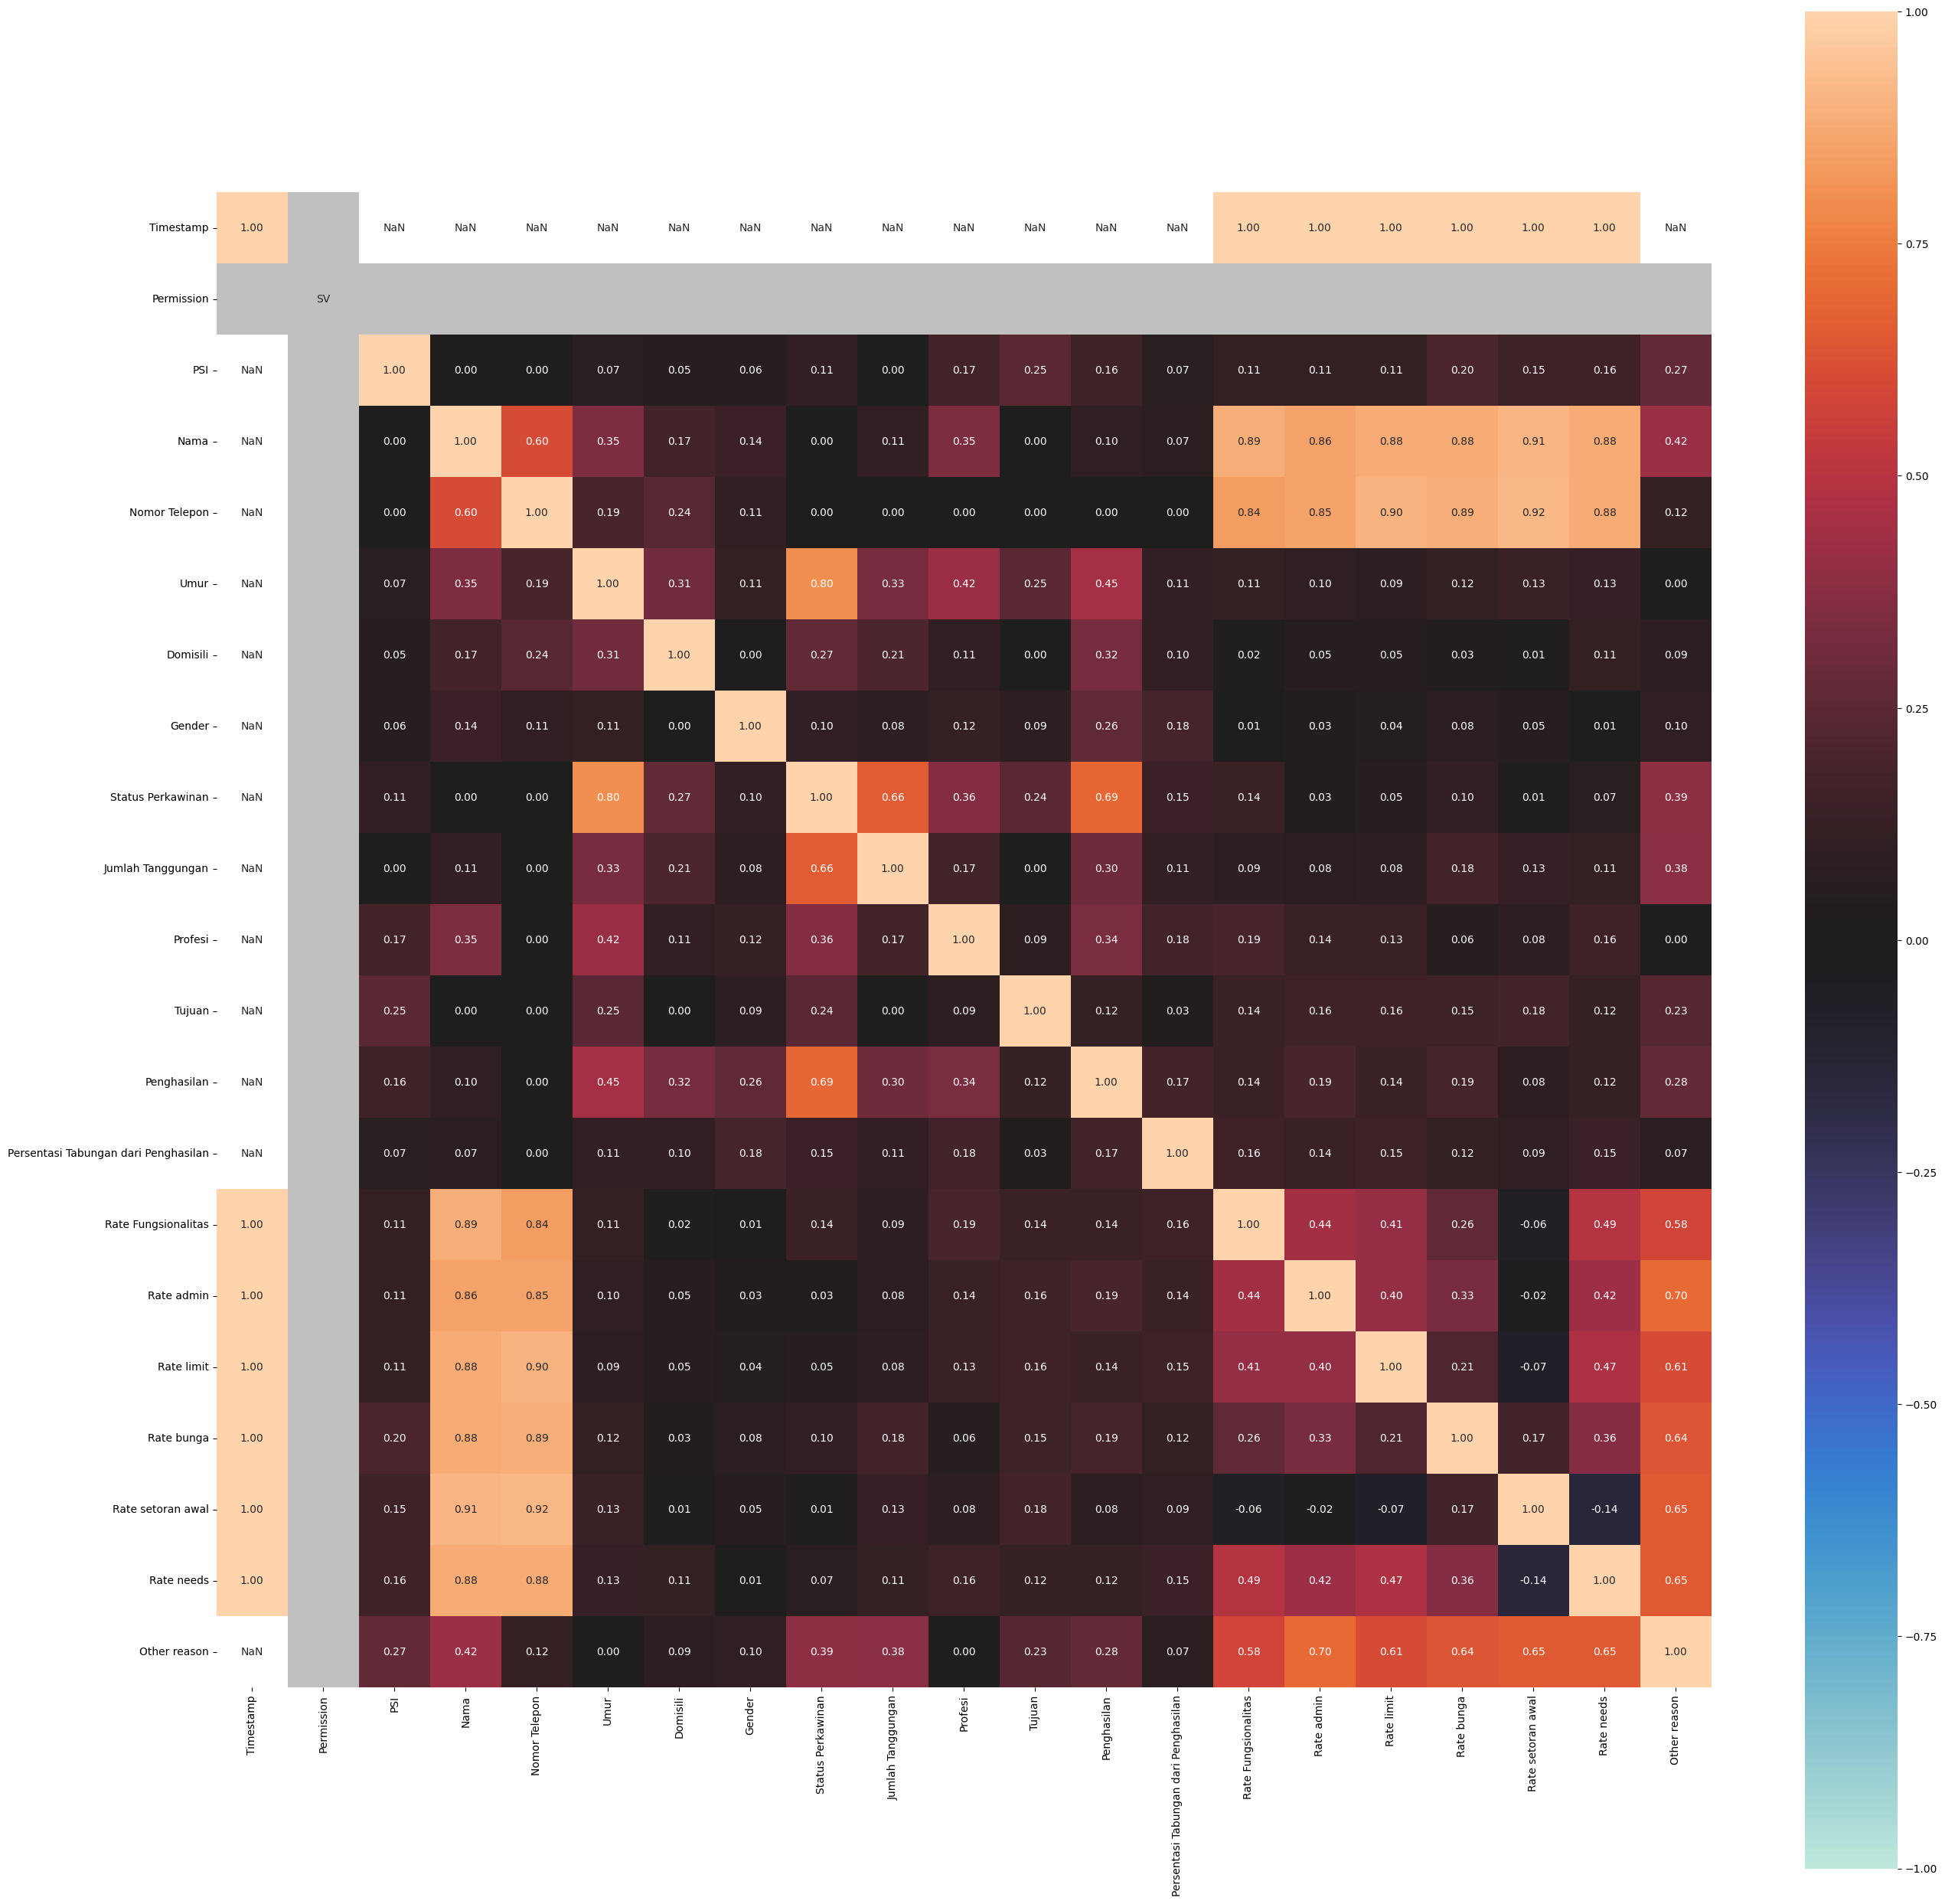

In [4]:
correlations = associations(data)
corr = correlations['corr']

In [5]:
# print value each attributes to label
print(corr['PSI'])

Timestamp                               0.000000
Permission                              0.000000
PSI                                     1.000000
Nama                                    0.000000
Nomor Telepon                           0.000000
Umur                                    0.066595
Domisili                                0.052841
Gender                                  0.058485
Status Perkawinan                       0.109228
Jumlah Tanggungan                       0.000000
Profesi                                 0.172183
Tujuan                                  0.248267
Penghasilan                             0.159157
Persentasi Tabungan dari Penghasilan    0.067259
Rate Fungsionalitas                     0.110639
Rate admin                              0.109852
Rate limit                              0.110832
Rate bunga                              0.200952
Rate setoran awal                       0.153848
Rate needs                              0.163458
Other reason        

In [1]:
# remove where value < 0.5

irrelevant_attributes = corr['PSI'][corr['PSI'] < 0.05].keys()
print(irrelevant_attributes)

# Hapus kolom dengan korelasi < 0.005
data.drop(irrelevant_attributes, inplace=True)

NameError: name 'corr' is not defined